_____________________________________________________________________________________________________________________________________________________________________________________________

Модель

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

df = pd.read_csv("train.csv")

# Загрузка данных
iris = load_iris()
X = df.drop('target', axis = 1)
y = df['target']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создание модели
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Обучение модели
rf_classifier.fit(X_train, y_train)

# Предсказания на тестовой выборке
y_pred = rf_classifier.predict(X_test)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.2f}")

# Определение гиперпараметров для настройки
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Создание экземпляра GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Поиск лучших параметров
grid_search.fit(X_train, y_train)

# Вывод лучших параметров
print(f"Лучшие параметры: {grid_search.best_params_}")

# Создание модели с лучшими параметрами
best_rf_classifier = grid_search.best_estimator_

# Предсказания на тестовой выборке
y_pred_best = best_rf_classifier.predict(X_test)

# Оценка точности модели с лучшими параметрами
best_accuracy = accuracy_score(y_test, y_pred_best)
print(f"Точность модели с лучшими параметрами: {best_accuracy:.2f}")


Точность модели: 1.00
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Лучшие параметры: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Точность модели с лучшими параметрами: 1.00


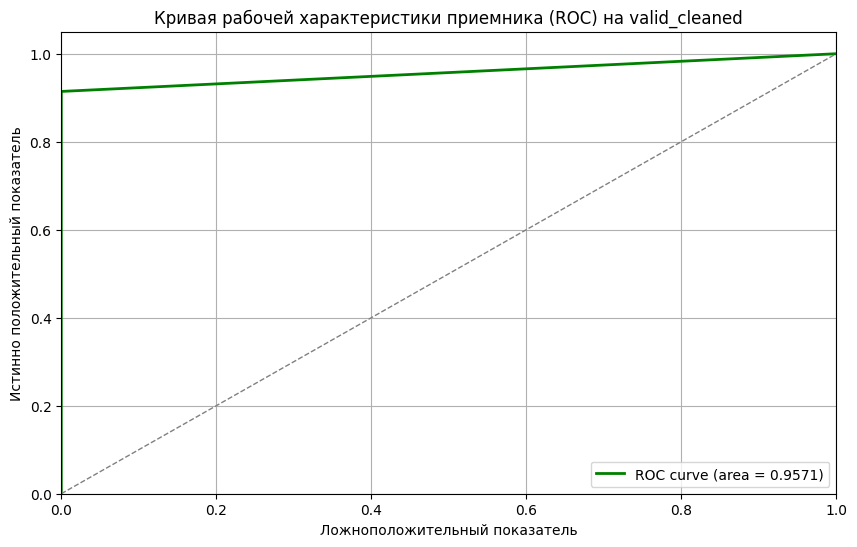

In [11]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_best)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (area = {roc_auc_score(y_test, y_pred_best):.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ложноположительный показатель')
plt.ylabel('Истинно положительный показатель')
plt.title('Кривая рабочей характеристики приемника (ROC) на valid_cleaned')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()